# Question 1:
1. Using the IRIS dataset do the NaiveBayes Modelling.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

###  Loading the Data (Iris Dataset)

In [3]:
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

### Basic plots

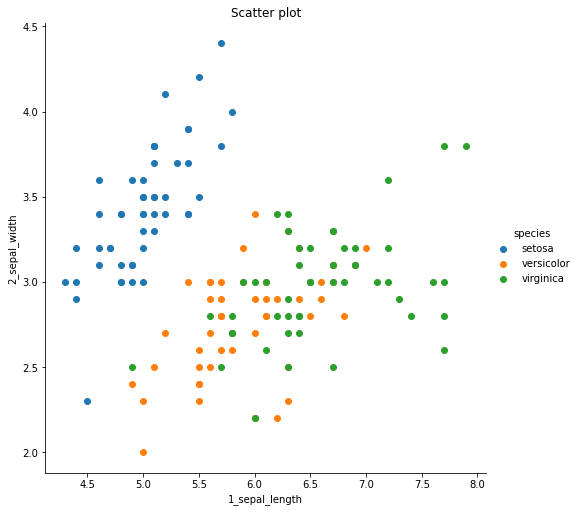

In [4]:
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", size=7).map(plt.scatter,"1_sepal_length", "2_sepal_width", ).add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

### Naive Bayes Classifier

In [5]:
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

#Fit model
model = GaussianNB(priors = None)
model.fit(X_data,y_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

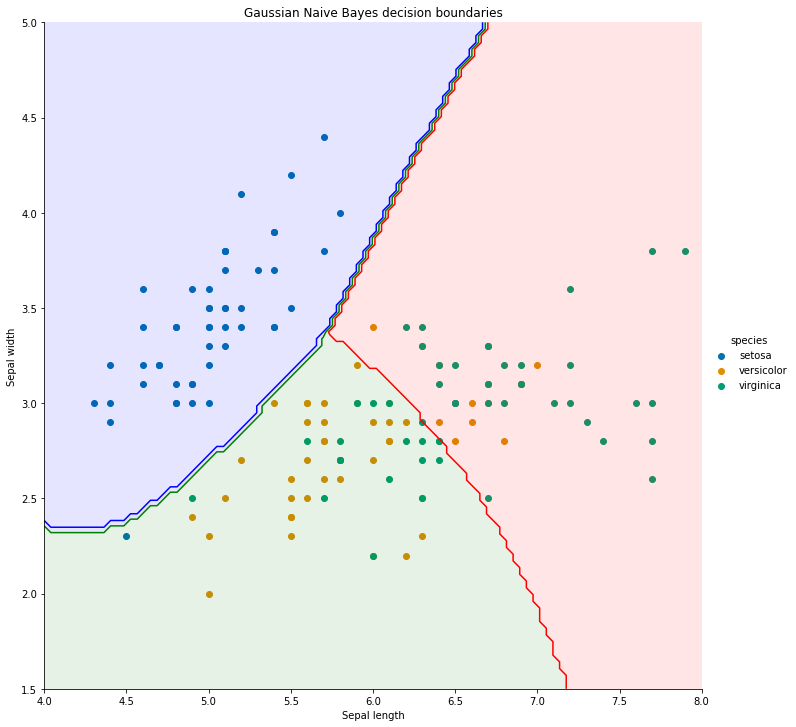

In [6]:
# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind').map(plt.scatter, "1_sepal_length", "2_sepal_width",).add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array([model.predict([[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y))])

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries');

### Measuring Model Performance (Iris Dataset)¶¶

In [7]:
model.score(X_data, y_labels)

0.78